In [1]:
import sys
sys.path.append("HyperNetX")
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
from hgDecompose.Hypergraph import Hypergraph
from hgDecompose.hgDecompose import HGDecompose
from hgDecompose.optimizedhgDecompose import HGDecompose as newHgDecomp

In [74]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP'),
    # 8: ('TH','JU','FN','JV')
}

# scenes = {
#     0: ('A', 'B'),
#     1: ('B', 'C', 'D', 'E'),
#     2: ('C', 'G','E'),
#     3: ('C', 'F', 'H', 'K'),
#     # 4: ('A', 'B', 'D', 'E')
# }
# H = hnx.Hypergraph(scenes)
# scenes = {
#     0: ('x','b'),
#     1: ('x','c'),
#     2: ('x','d'),
#     3: ('e','x')
# }
# scenes = {
#     0: ('x','b'),
#     1: ('x','c'),
#     2: ('x','d'),
#     3: ('y','x','z')
# }
# scenes = {
#     0: ('a','b','c','d','e','f'),
#     1: ('x','a'),
#     2: ('x','b'),
#     3: ('x','c'),
#     4: ('x','d')
# }
H = hnx.Hypergraph(scenes)
h = Hypergraph(_edgedict = scenes)
print( [(v,h.llb[v],h.lub[v]) for v in h.llb])
hgDecompose = newHgDecomp()
hgDecompose.naiveNBR(h, verbose=False)
print(len(hgDecompose.core))
print(hgDecompose.core)

[('FN', 2, 2), ('TH', 1, 2), ('JV', 6, 6), ('BM', 6, 6), ('JA', 2, 2), ('JU', 6, 6), ('CH', 6, 6), ('BR', 6, 6), ('CN', 6, 6), ('CC', 6, 6), ('GP', 1, 1), ('MP', 1, 1), ('MA', 1, 1)]
13
{'MP': 1, 'MA': 1, 'GP': 1, 'JA': 2, 'TH': 2, 'FN': 2, 'JU': 6, 'CC': 6, 'JV': 6, 'BR': 6, 'CN': 6, 'CH': 6, 'BM': 6}


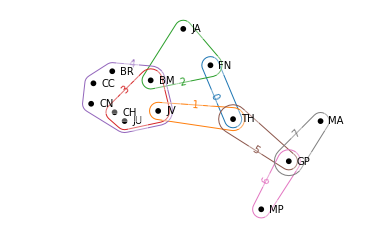

In [77]:
# Draw the hypergraph! For more on using all of the parameters
# of the draw function see the Visualization tutorial
from matplotlib import pyplot as plt
hnx.draw(H)
plt.show()

{7}
incident edge:  7
visiting  GP
removing  7  from  GP  's incident edges
deleting  7


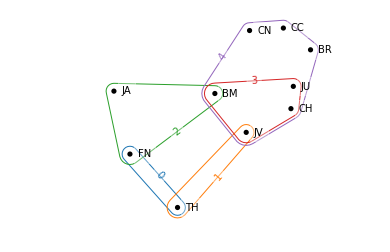

In [7]:
h = Hypergraph(_edgedict = scenes)
h.removeV_transform('MA',True)
# hnx.draw(h.get_hnx_format())
h.removeV_transform('MP')
h.removeV_transform('GP')
hnx.draw(h.get_hnx_format())

In [1]:
""" Test our hypergraph class """
from hgDecompose.Hypergraph import Hypergraph
import hypernetx as hnx
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}
h = Hypergraph(_edgedict = scenes)

print(h.neighbors('JA'),'|',h.neighbors('BM'))
# subg = h.strong_subgraph(['MA','GP','MP','TH','JA']).get_hnx_format()
# hnx.draw(subg)
# print(h.strong_subgraph(['MA','GP','MP','TH','JA']).neighbors('GP'))
# print(h.neighbors('BM'))
print(h.degree('CN'),'|',h.degree('BM'),'|',h.degree('MP'))
print(h.get_number_of_nbrs('CN'),'|',h.get_number_of_nbrs('BM'),'|',h.get_number_of_nbrs('MP'))
print([x for x in h.neighbors('CN')],' ',[x for x in h.neighbors('BM')],' ',[x for x in h.neighbors('MP')])
# hnx.draw(h.strong_subgraph(['FN', 'TH', 'JV', 'BM', 'JA', 'JU', 'CH', 'BR', 'CN', 'CC', 'GP']).get_hnx_format())
nbrs_FN = h.neighbors('FN')
h.removeV_transform('FN',True)
print([x for x in h.neighbors('JA')])
print([x for x in h.neighbors_iterator('JA')])
print(h.get_number_of_nbrs('JA'))

hnx.draw(h.get_hnx_format())
for u in nbrs_FN:
    print(u,' ',h.degree(u))
# print([x for x in h.neighbors('CN')],' ',[x for x in h.neighbors('BM')],' ',[x for x in h.neighbors('MP')])
# for v in h.node_iterator():
#     print(v)

# for e in h.edge_iterator():
#     print(e)

# print(h.e_indices)
# print(h.e_nodes)

# hnx_h = h.get_hnx_format()
# hnx.draw(hnx_h)

{'BM', 'FN'} | {'JV', 'JA', 'CH', 'BR', 'FN', 'CN', 'CC', 'JU'}
1 | 3 | 1
6 | 8 | 1
['CC', 'JU', 'JV', 'BM', 'CH', 'BR']   ['JV', 'JA', 'CH', 'BR', 'FN', 'CN', 'CC', 'JU']   ['GP']
{0, 2}
visiting  TH
removing  0  from  TH  's incident edges
deleting  0
visiting  BM
removing  2  from  BM  's incident edges
visiting  JA
removing incident edge entry of  JA
JA  : a 0-degree vertex
deleting  2
[]
[]
0
TH   2
BM   2


In [2]:
print([x for x in h.neighbors('FN')])
print([x for x in h.neighbors_iterator('FN')])
print(h.get_number_of_nbrs('FN'))
print(h.degree('FN'))

[]
[]
0
0


In [5]:
subg = h.strong_subgraph(['FN', 'TH', 'JV', 'BM', 'JA', 'JU', 'CH', 'BR', 'CN', 'CC', 'GP'])
print(subg.i)
print(h.i)
cpy_h = h
print(cpy_h.i)

20
24
24


naive nbr
-----

In [2]:
from hgDecompose.optimizedhgDecompose import HGDecompose 
from hgDecompose.utils import get_hg
name = 'enron'
# name = 'bin_1'
H = get_hg(name)
hgDecompose = HGDecompose()
hgDecompose.naiveNBR(H, verbose=False)
print(len(hgDecompose.core))
core_base = hgDecompose.core

67


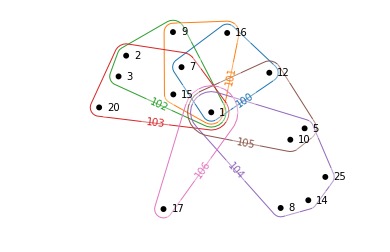

In [70]:
from hgDecompose.optimizedhgDecompose import HGDecompose 
from hgDecompose.utils import get_hg,get_hg_hnx
name = 'enron'
scenes = {
    100: (7,16,1,12),
    101: (15,9,16,1),
    102: (9,7,1,3,2),
    103: (15,7,1,20,3,2),
    104: (1,14,10,8,5,25),
    105: (1,12,10,5),
    106: (17,1)
}
H = hnx.Hypergraph(scenes)
# H = get_hg_hnx(scene)
from matplotlib import pyplot as plt
hnx.draw(H)
plt.show()



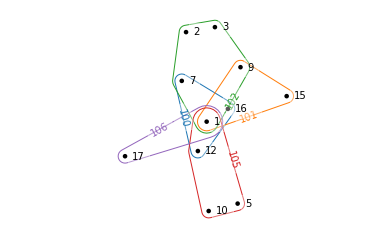

In [71]:
from hgDecompose.optimizedhgDecompose import HGDecompose 
from hgDecompose.utils import get_hg,get_hg_hnx
name = 'enron'
scenes = {
    100: (7,16,1,12),
    101: (15,9,16,1),
    102: (9,7,1,3,2),
    105: (1,12,10,5),
    106: (17,1)
}
H = hnx.Hypergraph(scenes)
# H = get_hg_hnx(scene)
from matplotlib import pyplot as plt
hnx.draw(H)
plt.show()

In [2]:
from hgDecompose.optimizedhgDecompose import HGDecompose 
from hgDecompose.utils import get_hg
H = get_hg(name)
hgDecompose = HGDecompose()
hgDecompose.improvedNBR(H, verbose=False)
# hgDecompose.improved2NBR(H, s = 1, verbose=False)
print(len(hgDecompose.core))
core_compared = hgDecompose.core

100


In [3]:
assert len(core_base) == len(core_compared), "Two returned cores do not have same length: " + str(len(core_base)) + " != " + str(len(core_compared))

# core_base contains in core_compared
for v in core_base:
    assert v in core_compared, str(v) + " is not in core_compared"
    assert core_base[v] == core_compared[v], str(v)+" :Output core is different in " + str(core_base[v]) + " & " + str(core_compared[v])

# core_compared contains in core_base
for v in core_compared:
    assert v in core_base, str(v) + " is not in core_base"
    assert core_base[v] == core_compared[v], str(v)+" :Output core is different in " + str(core_base[v]) + " & " + str(core_compared[v])

print("\nAll tests passed")

AssertionError: 4 :Output core is different in 29 & 31

In [7]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.003778219223022461, 1.5020370483398438e-05, 6.461143493652344e-05, 0)

In [8]:
hgDecompose.num_bucket_update, hgDecompose.num_neighborhood_computation, hgDecompose.num_degree_computation

(13, 13, 0)

In [9]:
hgDecompose = newHgDecomp()
hgDecompose.naiveNBR(h, verbose=False)
hgDecompose.core

{'MP': 1,
 'MA': 1,
 'GP': 1,
 'JA': 2,
 'TH': 2,
 'FN': 2,
 'JU': 6,
 'CN': 6,
 'BM': 6,
 'CC': 6,
 'CH': 6,
 'JV': 6,
 'BR': 6}

In [10]:
hgDecompose = newHgDecomp()
hgDecompose.naiveNBR(h, verbose=False)
hgDecompose.core

{'MP': 1,
 'MA': 1,
 'GP': 1,
 'JA': 2,
 'TH': 2,
 'FN': 2,
 'JU': 6,
 'CN': 6,
 'BM': 6,
 'CC': 6,
 'CH': 6,
 'JV': 6,
 'BR': 6}

In [11]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.00020813941955566406, 1.0728836059570312e-05, 1.5735626220703125e-05, 0)

In [12]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.00020813941955566406, 1.0728836059570312e-05, 1.5735626220703125e-05, 0)

In [13]:
hgDecompose.num_bucket_update, hgDecompose.num_neighborhood_computation, hgDecompose.num_degree_computation

(13, 13, 0)

optimized naivenbr
------

In [1]:
from hgDecompose.optimizedhgDecompose import HGDecompose as optHgDecomp
from hgDecompose.Hypergraph import Hypergraph
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}
h = Hypergraph(_edgedict = scenes)
hgDecompose = optHgDecomp()
hgDecompose.naiveNBR(h, verbose=True)
hgDecompose.core


---------- Initial bucket -------
{3: {'TH', 'GP', 'FN'}, 7: {'JV'}, 8: {'BM'}, 2: {'JA'}, 6: {'CH', 'JU', 'BR', 'CC', 'CN'}, 1: {'MP', 'MA'}}

k: 1 node: MP
node_to_num_neighbours:  {'FN': 3, 'TH': 3, 'JV': 7, 'BM': 8, 'JA': 2, 'JU': 6, 'CH': 6, 'BR': 6, 'CN': 6, 'CC': 6, 'GP': 3, 'MP': 1, 'MA': 1}
Considering neighbor GP
max core between 1 and 2 is  2
The location of GP is updated from 3 to 2
-------- Updated bucket ---------
{3: {'TH', 'FN'}, 7: {'JV'}, 8: {'BM'}, 2: {'GP', 'JA'}, 6: {'CH', 'JU', 'BR', 'CC', 'CN'}, 1: {'MA'}}

k: 1 node: MA
node_to_num_neighbours:  {'FN': 3, 'TH': 3, 'JV': 7, 'BM': 8, 'JA': 2, 'JU': 6, 'CH': 6, 'BR': 6, 'CN': 6, 'CC': 6, 'GP': 2, 'MP': 1, 'MA': 1}
Considering neighbor GP
max core between 1 and 1 is  1
The location of GP is updated from 2 to 1
-------- Updated bucket ---------
{3: {'TH', 'FN'}, 7: {'JV'}, 8: {'BM'}, 2: {'JA'}, 6: {'CH', 'JU', 'BR', 'CC', 'CN'}, 1: {'GP'}}

k: 1 node: GP
node_to_num_neighbours:  {'FN': 3, 'TH': 3, 'JV': 7, 'BM': 8, '

{'MP': 1,
 'MA': 1,
 'GP': 1,
 'TH': 2,
 'JA': 2,
 'FN': 2,
 'JV': 6,
 'BM': 6,
 'CH': 6,
 'JU': 6,
 'BR': 6,
 'CC': 6,
 'CN': 6}

optimized improvednbr 
----------

In [2]:
# import matplotlib
# matplotlib.use('TkAgg')
from hgDecompose.optimizedhgDecompose import HGDecompose as optHgDecomp
from hgDecompose.Hypergraph import Hypergraph
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}
h = Hypergraph(_edgedict = scenes)
hgDecompose = optHgDecomp()
# hgDecompose.naiveNBR(h, verbose=True)
# print(hgDecompose.core)
hgDecompose.improvedNBR(h, verbose=True)
print(hgDecompose.core)


---------- Initial neighbors -------
FN ['TH', 'BM', 'JA']
TH ['FN', 'JV', 'GP']
JV ['TH', 'JU', 'CH', 'BM', 'BR', 'CN', 'CC']
BM ['FN', 'JA', 'JV', 'JU', 'CH', 'BR', 'CN', 'CC']
JA ['BM', 'FN']
JU ['JV', 'CH', 'BM', 'BR', 'CN', 'CC']
CH ['JV', 'JU', 'BM', 'BR', 'CN', 'CC']
BR ['JU', 'CH', 'CN', 'CC', 'JV', 'BM']
CN ['JU', 'CH', 'BR', 'CC', 'JV', 'BM']
CC ['JU', 'CH', 'BR', 'CN', 'JV', 'BM']
GP ['TH', 'MP', 'MA']
MP ['GP']
MA ['GP']


---------- Initial bucket -------
{3: {'TH', 'GP', 'FN'}, 7: {'JV'}, 8: {'BM'}, 2: {'JA'}, 6: {'CH', 'JU', 'BR', 'CC', 'CN'}, 1: {'MP', 'MA'}}

k: 1 node: MP
removing  MP
incident edges on  MP  :  {6}
traversing nbr:  GP
max core between 1 and 2 is  2
The location of GP is updated from 3 to 2
-------- Updated bucket ---------
{3: {'TH', 'FN'}, 7: {'JV'}, 8: {'BM'}, 2: {'GP', 'JA'}, 6: {'CH', 'JU', 'BR', 'CC', 'CN'}, 1: {'MA'}}

k: 1 node: MA
removing  MA
incident edges on  MA  :  {7}
traversing nbr:  GP
max core between 1 and 1 is  1
The location of GP i

naive deg
------

In [14]:
hgDecompose = HGDecompose()
hgDecompose.naiveDeg(H, verbose=False)
hgDecompose.core

{'JA': 1,
 'BR': 1,
 'MP': 1,
 'MA': 1,
 'FN': 1,
 'JU': 1,
 'CN': 1,
 'CC': 1,
 'GP': 1,
 'CH': 1,
 'BM': 1,
 'JV': 1,
 'TH': 1}

In [15]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.0064411163330078125, 2.765655517578125e-05, 0, 9.5367431640625e-05)

In [16]:
hgDecompose.num_bucket_update, hgDecompose.num_neighborhood_computation, hgDecompose.num_degree_computation

(16, 0, 16)

In [17]:
hgDecompose = newHgDecomp()
hgDecompose.naiveDeg(h, verbose=False)
hgDecompose.core

{'JA': 1,
 'BR': 1,
 'MP': 1,
 'MA': 1,
 'FN': 1,
 'JU': 1,
 'CN': 1,
 'CC': 1,
 'GP': 1,
 'CH': 1,
 'BM': 1,
 'JV': 1,
 'TH': 1}

In [18]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.0002529621124267578, 1.33514404296875e-05, 0, 1.3828277587890625e-05)

In [19]:
hgDecompose.num_bucket_update, hgDecompose.num_neighborhood_computation, hgDecompose.num_degree_computation

(16, 0, 16)

improved algorithm (1)
----------

In [20]:
hgDecompose = HGDecompose()
hgDecompose.improvedNBR(H, verbose=False)
hgDecompose.core

{'MP': 1,
 'MA': 1,
 'GP': 1,
 'JA': 2,
 'FN': 2,
 'TH': 2,
 'JU': 6,
 'CN': 6,
 'BM': 6,
 'CC': 6,
 'CH': 6,
 'JV': 6,
 'BR': 6}

In [21]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.005022287368774414, 1.71661376953125e-05, 6.341934204101562e-05, 0)

In [22]:
hgDecompose = newHgDecomp()
hgDecompose.improvedNBR(h, verbose=False)
hgDecompose.core

{'MP': 1,
 'MA': 1,
 'GP': 1,
 'JA': 2,
 'FN': 2,
 'TH': 2,
 'JU': 6,
 'CN': 6,
 'BM': 6,
 'CC': 6,
 'CH': 6,
 'JV': 6,
 'BR': 6}

In [23]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.0003190040588378906, 1.1682510375976562e-05, 1.4781951904296875e-05, 0)

In [24]:
hgDecompose = HGDecompose()
hgDecompose.improved2NBR(H, verbose=False)
hgDecompose.core

{'JV': 6,
 'BM': 6,
 'JU': 6,
 'CH': 6,
 'BR': 6,
 'CN': 6,
 'CC': 6,
 'TH': 2,
 'JA': 2,
 'FN': 2,
 'MP': 1,
 'MA': 1,
 'GP': 1}

In [25]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.009204864501953125, 9.298324584960938e-06, 0.00025272369384765625, 0)

In [26]:
hgDecompose = newHgDecomp()
hgDecompose.improved2NBR(h, verbose=False)
hgDecompose.core

{'JV': 6,
 'BM': 6,
 'JU': 6,
 'CH': 6,
 'BR': 6,
 'CN': 6,
 'CC': 6,
 'TH': 2,
 'JA': 2,
 'FN': 2,
 'MP': 1,
 'MA': 1,
 'GP': 1}

In [27]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.0007059574127197266, 2.5033950805664062e-05, 9.870529174804688e-05, 0)

In [1]:
from hgDecompose import utils
# datasets = ["syn", "bin_1", "bin_2", "bin_4", "bin_5"]
# datasets = ["enron","contact","congress"]
datasets = ['dblp','amazon']
for d in datasets:
    H = utils.get_hg_hnx(d)
    deg_stat = utils.get_degree_stats(H)
    dim_stat = utils.get_dim_stats(H)
    nbr_stat = utils.get_nbr_stats(H)
    print(d)
    print('N = ',utils.get_N(H))
    print('M = ',utils.get_M(H))
    print('deg stats: ',deg_stat)
    print('dim stats: ',dim_stat)
    print('nbr stats: ',nbr_stat)
    print("**************")

In [2]:
from hgDecompose import utils
from hgDecompose.Hypergraph import Hypergraph
# datasets = ["syn", "bin_1", "bin_2", "bin_4", "bin_5"]
# datasets = ["enron","contact","congress"]
datasets = ['dblp']
for d in datasets:
    H = utils.get_hg(d)
    deg_stat = H.get_degree_stats()
    dim_stat = H.get_dim_stats()
    nbr_stat = H.get_nbr_stats()
    print(d)
    print('N = ',H.get_N())
    print('M = ',H.get_M())
    print('deg stats: ',deg_stat)
    print('dim stats: ',dim_stat)
    print('nbr stats: ',nbr_stat)
    print("**************")

dblp
N =  1836596
M =  2170260
deg stats:  {'mean': 4.05729294847642, 'max': 846.0, 'min': 1.0, '25%': 1.0, '50%': 1.0, '75%': 3.0, 'std': 11.555908609668332}
dim stats:  {'mean': 3.4335093491102446, 'max': 280.0, 'min': 2.0, '25%': 2.0, '50%': 3.0, '75%': 4.0, 'std': 1.7536263661928082}
nbr stats:  {'mean': 9.049282476930147, 'max': 2215.0, 'min': 1.0, '25%': 2.0, '50%': 4.0, '75%': 8.0, 'std': 21.38138907920776}
**************


In [3]:
from hgDecompose import utils
from hgDecompose.Hypergraph import Hypergraph
# datasets = ["syn", "bin_1", "bin_2", "bin_4", "bin_5"]
# datasets = ["enron","contact","congress"]
datasets = ['amazon']
for d in datasets:
    H = utils.get_hg(d)
    deg_stat = H.get_degree_stats()
    dim_stat = H.get_dim_stats()
    nbr_stat = H.get_nbr_stats()
    print(d)
    print('N = ',H.get_N())
    print('M = ',H.get_M())
    print('deg stats: ',deg_stat)
    print('dim stats: ',dim_stat)
    print('nbr stats: ',nbr_stat)
    print("**************")

In [2]:
# from hgDecompose.utils import get_hg
# H = get_hg('dblp')

In [3]:
# N = 0
# for v in H.node_iterator():
#     N+=1
# print('Num vertices: ',N)

Num vertices:  1836597


In [ ]:
# del H

In [8]:
# v = '1261024'
# print(v in H.inc_dict)
# print(len(H.inc_dict[v]))
# print(H.inc_dict[v])
# print(H.get_edge_byindex(1109410))

True
1
{1109410}
['1261024', '1261024']


In [4]:
# H.precomputedlb2['1261024']

KeyError: '1261024'

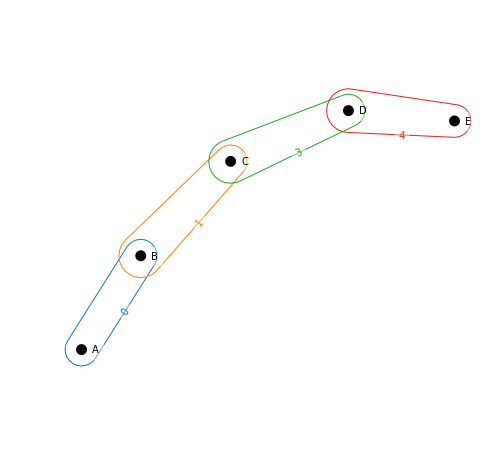

In [5]:
import sys
sys.path.append("HyperNetX")
import matplotlib.pyplot as plt
import hypernetx as hnx
# scenes = {
#     0: ('A', 'B'),
#     1: ('B', 'C'),
#     3: ('C','D'),
#     4: ('D', 'E')
# }
scenes = {
    0: ('A', 'B'),
    1: ('B', 'C', 'D', 'E'),
    2: ('C', 'F', 'G'),
    3: ('C', 'F', 'H', 'K'),
}

H = hnx.Hypergraph(scenes)
hnx.draw(H)